In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Introdução**

O conjunto de dados que irá ser utilizado contém informações sobre a vida e sintomas dos pacientes. Ao todo ele possui 17 atributos: a idade, gênero, poliúra, polidipsia, perda de peso, fadiga, polifagia, candidíase, visão embaçada, coceira, irritabilidade da pele, cicatrização atrasada, enfaquecimento dos músculos, calvície, obesidade e Diagnóstico para diabetes. Esse banco de dados foi extraído de  questionários realizados no hospital de Sylhet em Bagladesh,e tem como função servir de base para modelos que possam prever a ocorrência de diabetes.l em algum paciente dada as informações dele. **Dessa maneira, o objetivo principal desta análise é  criar um modelo que sirva como ferramenta para médicos clínicos poderem fazer uma triagem mais eficiente dos seus pacientes baseados nos seus sintomas e encaminhá-los a um tratamento adequado com a maior antecedência possível**


### **Variáveis**

**Sex** - Gênero do paciente \
  Valores: Masculino, feminino

**Age** - Idade do paciente em anos \

**poliúra**
(sim, não)

**polidipsia**
(sim, não)

**perda de peso**
(sim, não)

**fadiga**
(sim, não)

**polifagia**
(sim, não)

**candidíase**
(sim, não)

**visão embaçada**
(sim, não)

**coceira**\
(sim, não)

**irritabilidade da pele**
(sim, não)

**cicatrização atrasada**
(sim, não)

**enfaquecimento dos músculos**
(sim, não

**calvície**
(sim, não)

**obesidade**
(sim, não)

**Diagnóstico de diabetes**
(sim, não)


In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### **Análise exploratória da base de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edf4e75d0>],
      dtype=object)

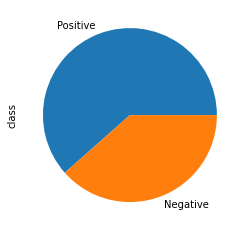

In [ ]:
df['class'].value_counts().plot.pie(subplots=True)

O gráfico de pizza mostra que existe uma distribuição uniforme de casos positivos e negativos

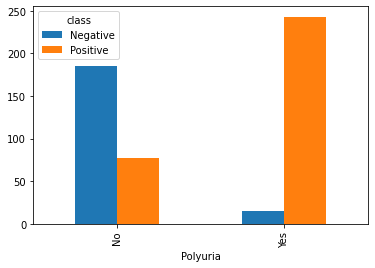

In [ ]:
pd.crosstab([df['Polyuria']], df['class']).plot.bar()

Esse gráfico evidencia que na grande maioria dos casos positivos, o sintoma de poliúra está presente, o que pode ser um indicativo importante para diabetes.

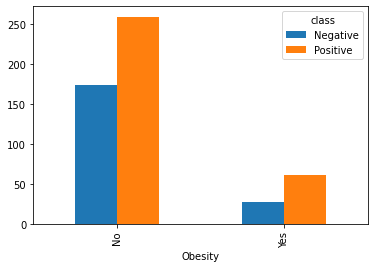

In [ ]:
pd.crosstab([df['Obesity']], df['class']).plot.bar()

Esse gráfico mostra que o fator da obesidade não é decisivo na hora de concluir se uma pessoa tem diabetes, pois muitos pacientes que não são obesos testaram positivo.

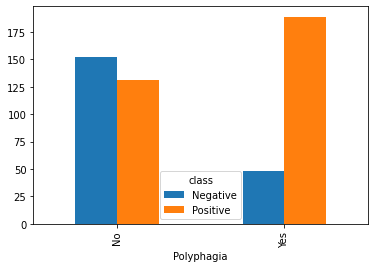

In [ ]:
pd.crosstab([df['Polyphagia']], df['class']).plot.bar()

Aqui é possível observar um fenômeno interessante: casos que negativaram diabetes possuem uma distribuição mais uniforme de polifagia. Por outro lado, casos que positivaram para diabetes possuem uma quantidade muito maior de sintomas de polifagia. Isso pode indicar que esse sintoma também pode ser determinante para o diagnóstico positivo

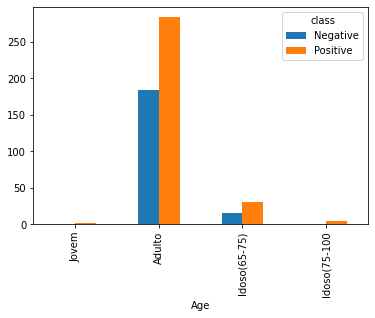

In [ ]:
Categorias = ['Criança','Jovem','Adulto','Idoso(65-75)','Idoso(75-100']
Intervalos = [0,10,18,65,75,100]
faixas = pd.cut(df['Age'], bins = Intervalos, labels = Categorias)
df2 = pd.concat([df['class'],faixas],axis=1 )
pd.crosstab([df2['Age']], df2['class']).plot.bar()

Esse gráfico mostra a ocorrência dos diagnósticos de diabetes para as faixas de idade. Como é possível observar, a grande parte dos pacientes está na faixa adulta, que também é onde os diagnósticos positivos e negativos estão distribuídos mais uniformemente. A partir do momento que a idade avança, é possível observar que o número de diagnósticos positivos vai ficando maior se proporcionalmente comparado com o dos negativos. Isso pode indicar que pacientes com uma idade mais avançada possuem risco maior de contrair diabetes.

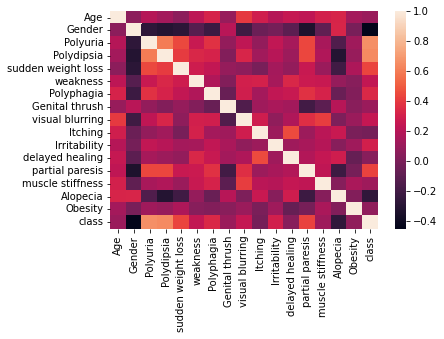

In [ ]:
for col in df.columns:
  df[col].replace(['No', 'Yes'],[0, 1], inplace=True)

df['class'].replace(['Positive','Negative'],[1,0],inplace=True)
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)

sns.heatmap(df.corr())

Aqui é possível observar que as correlações mais fortes entre o diagnóstico positivo e os sintomas são em relação à poliúra e polidipsia, como evidenciado anteriormente

### **Processamento dos dados**


In [ ]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, train_size=0.8)

Dividindo a base de dados em 80% para treino e 20% para teste

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(treino[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']],treino['class'])
acrr_treino = tree.score(treino[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']],treino['class'])
acrr_treino*100

93.26923076923077

93% de acurácia é perfeito para o objetivo de negócio. Dados alguns sintomas do paciente, ele consegue diferenciar com uma baixa taxa de erro quais pacientes estão de fato com diabetes ou não.

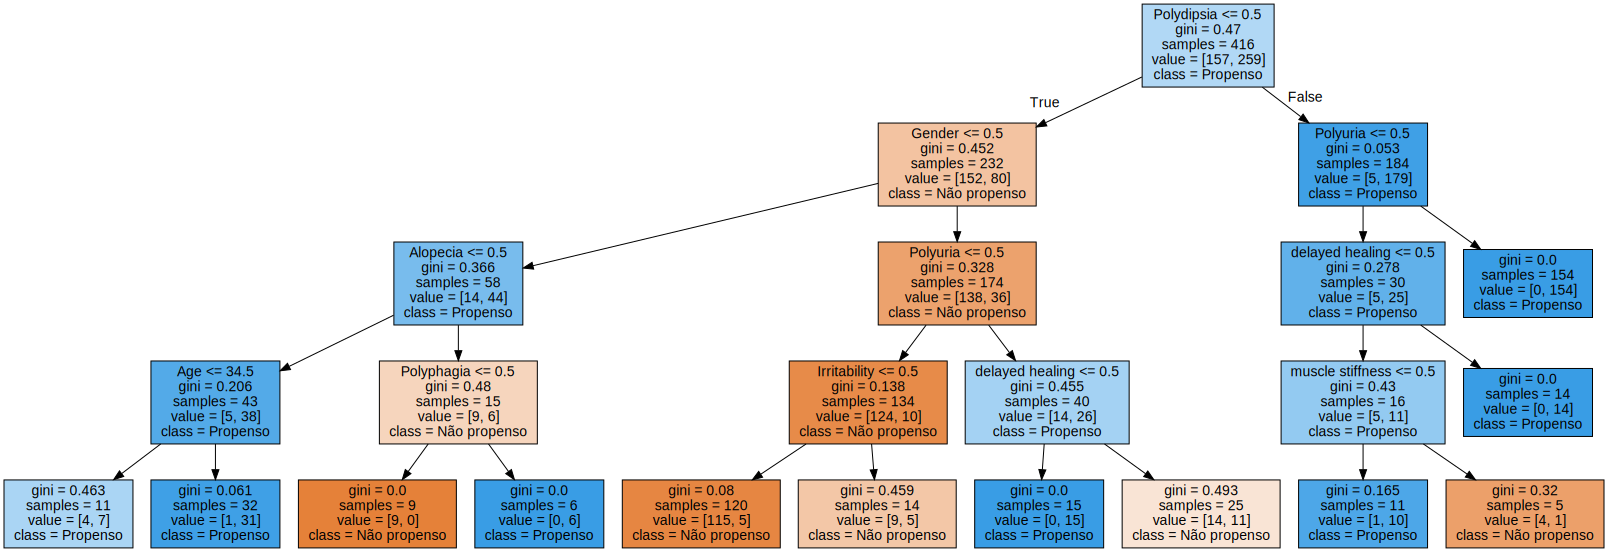

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(tree,filled=True,feature_names = ['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'], class_names = ['Não propenso','Propenso'])
Source (dot_data)

- De início, vemos que a quantidade de propensos a ter diabetes é muito maior no segmento à direita, que se refere à quem tem poliúra como sintoma, logo é possivel afirmar que a poliúra é um fator decisivo no diagnóstico do modelo.
- Observando o ramo mais a esquerda, é possível fazer a constatação de que a ausência de poliúra com a presença de polidipsia (apesar de ser uma combinação incomum) apresenta risco de diabetes.
- A presença de poliúra e polidipsia em uma idade menor do que 71 anos pode ser um forte indicativo de que a pessoa é propensa a ter diabetes, esse indicativo é ainda mais forte quando a pessoa é obesa.
- Se um paciente com mais de 71 anos com poliúra e fraqueza, então há risco de aqueles sintomas serem por causa da diabetes.


In [ ]:
prev_teste = tree.predict(teste[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']])
y_teste = pd.factorize(teste['class'])[0]
prev_teste

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_Teste = accuracy_score(prev_teste, y_teste)
acuracia_Teste*100

92.3076923076923

Por mais que o objetivo do modelo seja apenas auxiliar os médicos, ele se comprova bastante eficiente devido a sua alta acurácia no teste (93%).

[[41  2]
 [ 6 55]]


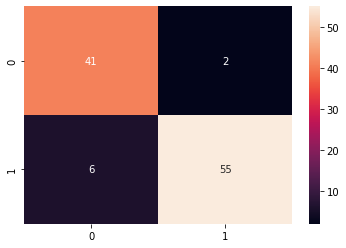

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste,prev_teste)
print(cm)
sns.heatmap(cm,annot=True)

Na perspectiva da alta acurácia do modelo em teste, a matriz de confusão revela algo muito positivo à respeito do modelo: O número de FN e FP é muito mais baixo do que o número de acertos reais, o que mostra a confiabilidade do algoritmo para ser usado em situações clínicas. No contexto do negócio a situação é a ideal.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,prev_teste))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.90      0.93        61

    accuracy                           0.92       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



Aqui é mais notável ainda a eficácia do modelo, com uma precisão de 94% nos casos positivos com um recall de 95%. Sendo assim, esse algoritmo é confiável e ajudaria muito na eficiência do atendimento e hospitalização de um centro de saúde.





### **Apriori**

In [ ]:
df = df.drop(['Age'],axis = 1)
df.rename(columns = {'class':'Diabetes'}, inplace = True)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
association_rules(apriori(df, min_support=0.2,use_colnames=True))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alopecia),(Gender),0.344231,0.630769,0.292308,0.849162,1.346232,0.075178,2.447863
1,(Polydipsia),(Polyuria),0.448077,0.496154,0.371154,0.828326,1.669495,0.148839,2.934904
2,(Polyuria),(Diabetes),0.496154,0.615385,0.467308,0.941860,1.530523,0.161982,6.615385
3,(Polydipsia),(Diabetes),0.448077,0.615385,0.432692,0.965665,1.569206,0.156953,11.201923
4,(sudden weight loss),(Diabetes),0.417308,0.615385,0.361538,0.866359,1.407834,0.104734,2.877984
...,...,...,...,...,...,...,...,...,...
174,"(Polyphagia, Diabetes, Polydipsia, Polyuria)",(partial paresis),0.250000,0.430769,0.207692,0.830769,1.928571,0.100000,3.363636
175,"(partial paresis, Polyphagia, Diabetes)","(Polydipsia, Polyuria)",0.257692,0.371154,0.207692,0.805970,2.171526,0.112049,3.240976
176,"(partial paresis, Polyphagia, Polyuria)","(Diabetes, Polydipsia)",0.236538,0.432692,0.207692,0.878049,2.029268,0.105344,4.651923
177,"(partial paresis, Polyphagia, Polydipsia)","(Diabetes, Polyuria)",0.228846,0.467308,0.207692,0.907563,1.942110,0.100751,5.762762


Em comparação com o a árvore de decisão, o modelo de apriori revela que quando o antecedente contém 49% dos resultados com poliúra, o resultado é Diabetes (sendo que a confiabilidade nessa informação é de 94%).Isso revela algo já destacado na análise da àrvore de decisão, que evidencia mais uma vez a poliúra como um fator decisivo para o diagnóstico positivo. Em seguida temos Polipsia e perda de peso, com 44% e 41% dos resultados indicando diabetes também.  

### **KMeans**

Para usar o modelo do KMeans, é necessário importar uma nova base de dados. O motivo de estarmos fazendo isso é porque a base usada para o modelo da árvore de decisão possui muitas colunas valores booleanos. Essas colunas em excesso tiram a eficiência do modelo KMeans, então optamos por utilizar uma base de dados que tenha mais valores numéricos e categóricos. Isso possibilitará criar um modelo mais eficiente e ajudará na análise como um todo.

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

### **Análise exploratória | Kmeans**

### **Modelo | Kmeans**